In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv(r'C:\Users\manav\Desktop\AQI Prediction\dataset\Final_aqi_weather.csv')
from sklearn.model_selection import train_test_split
X=df[['AQI','PM2.5','PM10','NO2','SO2','CO','O3','temperature_2m','relative_humidity_2m','wind_speed_10m']]
y=df[['Next_Day_AQI']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

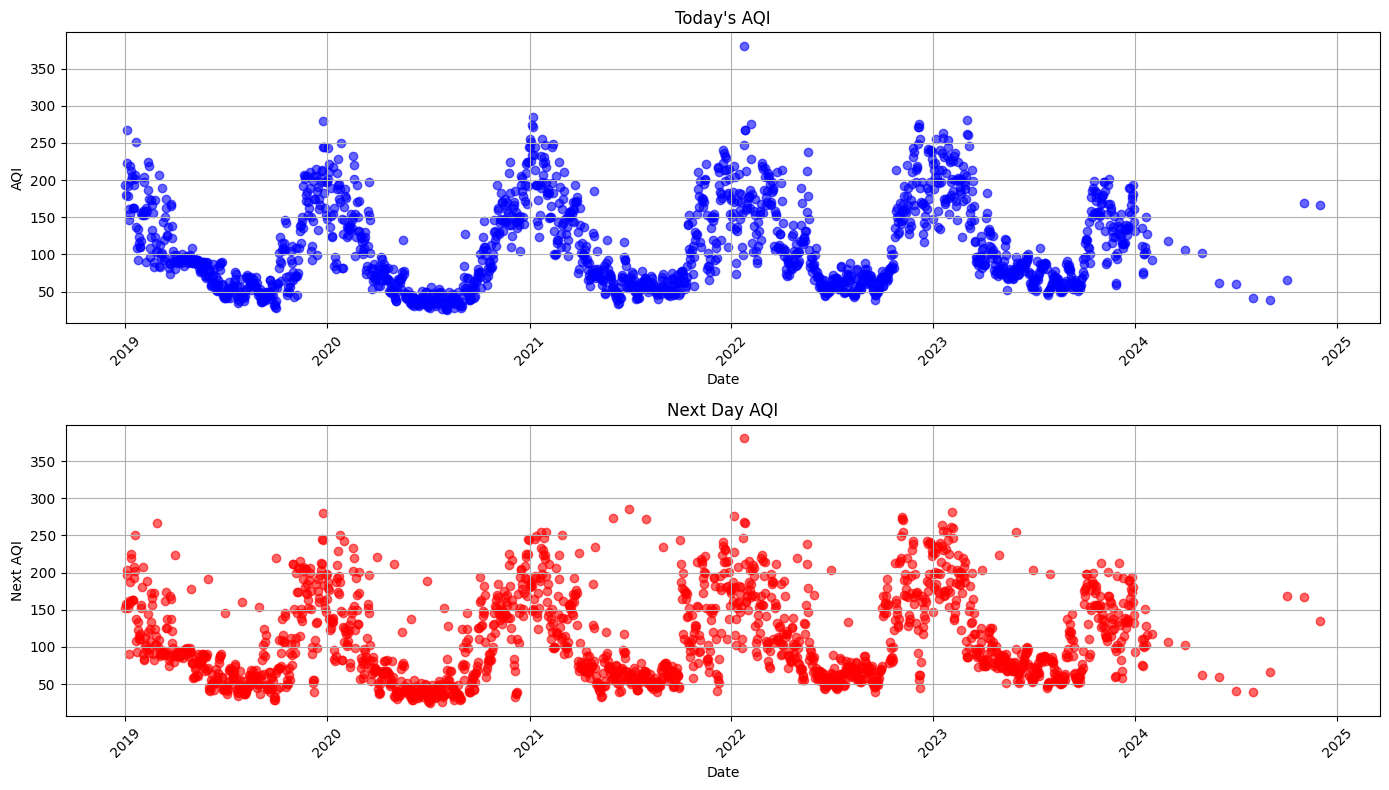

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure date is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Set up 2 plots vertically
plt.figure(figsize=(14, 8))

# Plot 1: Today's AQI
plt.subplot(2, 1, 1)
plt.scatter(df['date'], df['AQI'], color='blue', alpha=0.6)
plt.title("Today's AQI")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.grid(True)

# Plot 2: Next Day's AQI
plt.subplot(2, 1, 2)
plt.scatter(df['date'], df['Next_Day_AQI'], color='red', alpha=0.6)
plt.title("Next Day AQI")
plt.xlabel("Date")
plt.ylabel("Next AQI")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Base model
rf = RandomForestRegressor(random_state=42)

# 💡 Cleaned & Compatible param grid
param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True],  # ✅ Avoid using False to reduce invalid combos
    'max_features': ['sqrt', 'log2']  # ✅ Removed 'auto' to prevent compatibility issues
}

# Hyperparameter search
search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1,
    error_score='raise'  # Optional: crash on error if you want to debug
)

# Run the search
search.fit(X_train, y_train)

# Best model
best_rf = search.best_estimator_

# Predict
pred = best_rf.predict(X_test)

# # Evaluate
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# print("MAE : ", mean_absolute_error(y_test, pred))
# print("MSE : ", mean_squared_error(y_test, pred))
# print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
# print("R²  : ", r2_score(y_test, pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\manav\Desktop\AQI Prediction\myenv\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


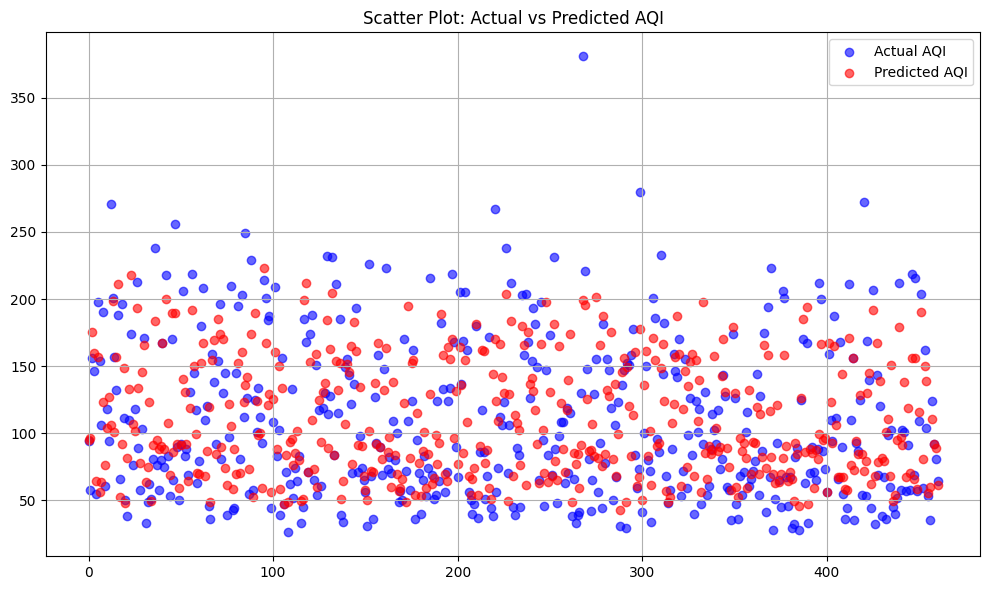

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label='Actual AQI')
plt.scatter(range(len(pred)), pred, color='red', alpha=0.6, label='Predicted AQI')
plt.title("Scatter Plot: Actual vs Predicted AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# If your prediction is stored in `pred`
y_pred = pred

# Now calculate metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²    : {r2:.2f}")


MAE  : 28.61
MSE  : 1588.59
RMSE : 39.86
R²    : 0.54


In [ ]:
print("Enter the following values:")

aqi = float(input("AQI: "))
pm25 = float(input("PM2.5: "))
pm10 = float(input("PM10: "))
no2 = float(input("NO2: "))
so2 = float(input("SO2: "))
co = float(input("CO: "))
o3 = float(input("O3: "))
temp = float(input("Temperature (°C): "))
humidity = float(input("Relative Humidity (%): "))
wind = float(input("Wind Speed (m/s): "))
precip = float(input("Precipitation (mm): "))

input_data = np.array([[aqi, pm25, pm10, no2, so2, co, o3, temp, humidity, wind, precip]])
predicted_aqi = model.predict(input_data)

print(f"\n📈 Predicted Next Day AQI: {predicted_aqi[0]:.2f}")